## **House Price Prediction Using Polynomial Regression** 

Importing Libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading The TrainSet

In [147]:
df = pd.read_excel("train.xlsx")

Null value percentages

In [148]:
Null=[]
for i in df:
    Null.append((i,df[i].isna().mean()*100))
Null=pd.DataFrame(Null,columns=['class','per'])
Null

,class,per
0,id,0.0
1,date,0.0
2,price,0.0
3,bedrooms,0.0
4,bathrooms,0.0
5,sqft_living,0.0
6,sqft_lot,0.0
7,floors,0.0
8,waterfront,0.0
9,view,0.0


Data is clean and doesnt have any *null* values. So no need for data cleaning in this case.

Pearson Correlations Heat map

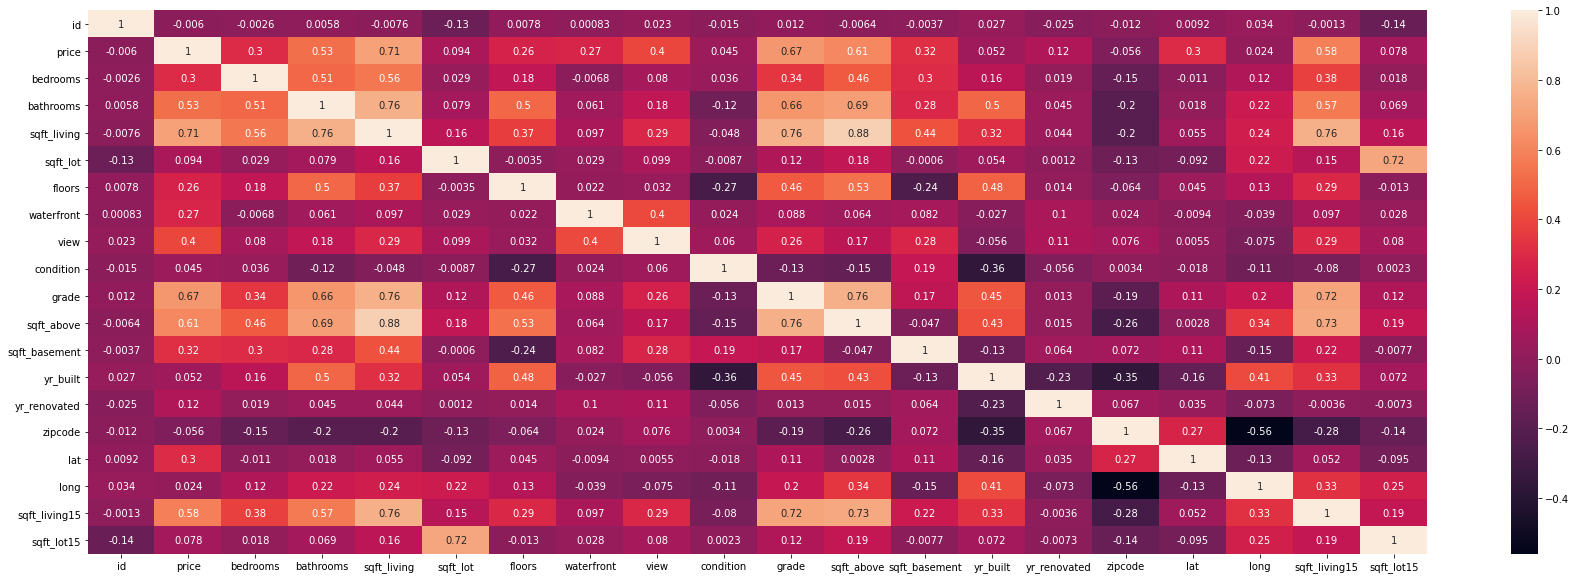

In [149]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot = True)

Based on the Heat map of pearson correlation, There is very less intra correlation. On inspecting the price column the very few columns are have a good correlation.

Seeing the correlation value for price column

In [150]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.705052
grade            0.665567
sqft_above       0.611453
sqft_living15    0.584807
bathrooms        0.527532
view             0.399658
sqft_basement    0.322383
bedrooms         0.300808
lat              0.299280
waterfront       0.274977
floors           0.262954
yr_renovated     0.120472
sqft_lot         0.094143
sqft_lot15       0.077943
yr_built         0.051759
condition        0.044732
long             0.023754
id              -0.005972
zipcode         -0.055629
Name: price, dtype: float64

Quick Inspection of Columns having correlation greater than 0.5

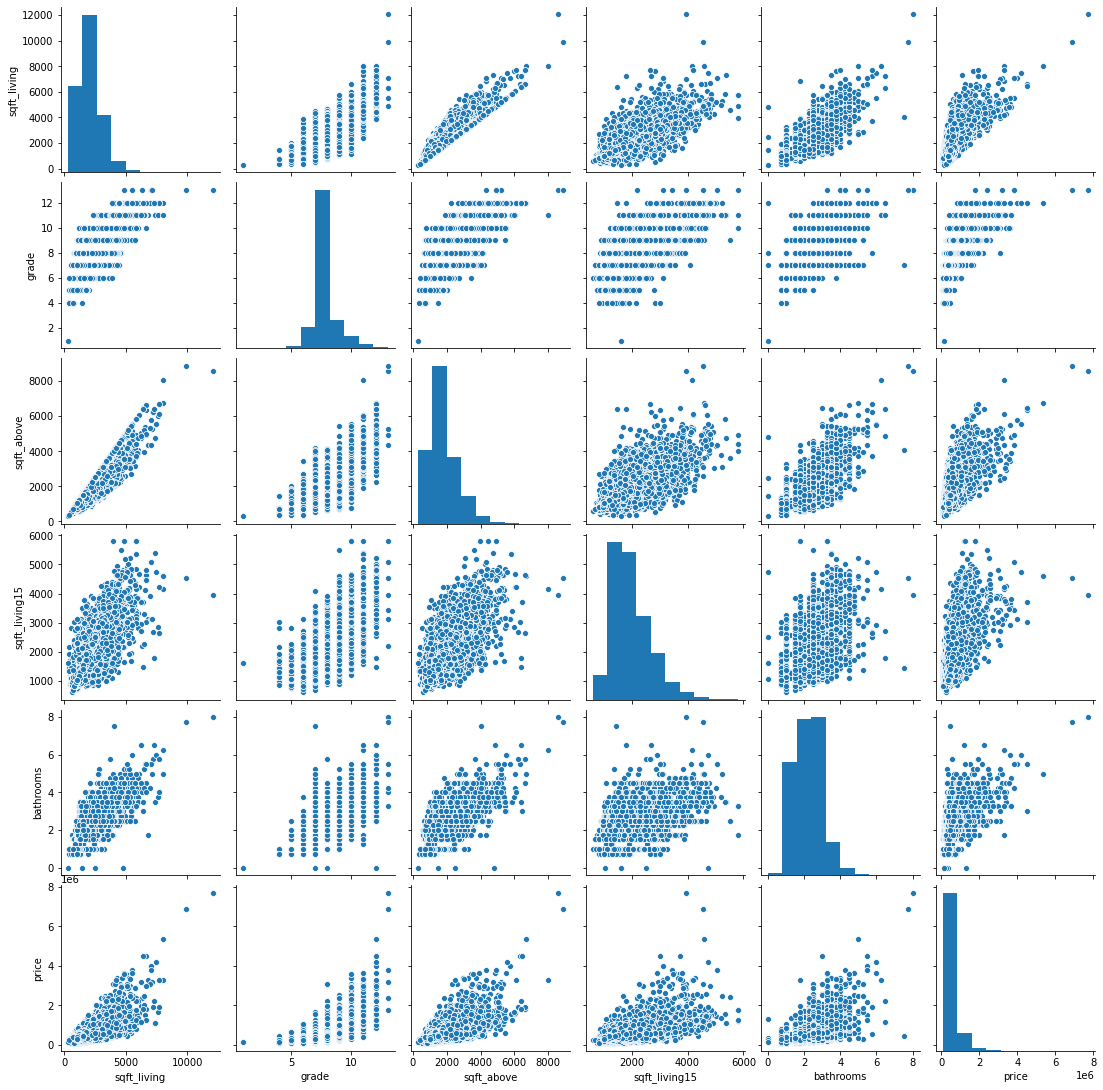

In [151]:
c=["sqft_living", "grade", "sqft_above","sqft_living15","bathrooms","price"]
df1 = df[c]
import seaborn as sns
sns.pairplot(df1)

The Distribution of data is not normal so we need to normalize the data. The graph of grade and price show a exponential growth.

In [152]:
df1 = (df1-df1.min()) / (df1.max()-df1.min()) # MIN MAX scaling

In [180]:
c1=["sqft_living", "grade", "sqft_above","sqft_living15","bathrooms"] # feature lsit

Model

In [211]:
train = df1[c1]
y = df1['price']
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(train) 
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Degree of the polynomial features is selected using trial and error 

RMSE on Train and Test values

In [212]:
from sklearn.metrics import mean_squared_error as mse
yp = lin.predict(X_poly)
np.sqrt(mse(y,yp))

0.029129840468804003

As the values have been normalized the value of price will be in between 0-1.
So, around 3% error on train values

In [213]:
test=pd.read_excel('test.xlsx')
test  = test[c]
test = (test-test.min()) / (test.max()-test.min()) # MIN MAX scaling
x=test[c1]

In [214]:
X_poly_test = poly.fit_transform(x)
y=test['price']
yp=lin.predict(X_poly_test)
np.sqrt(mse(y,yp))

0.0834663873986489

And around 8% error on the test data

As there is no much difference between the test and train error we can say that there is no overfit on the data. 